
#**Milestone 2: Data Exploration & Preprocessing**

*   Inspect the text data
*   Check target distribution
*   Check word length
*   Preprocess the data
*   Create a word cloud
*   Calculate word counts



### **Setting up the environment**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###**Importing the required modules**

In [ ]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import pickle
import nltk
import string

from wordcloud import WordCloud
from scipy.stats import mode
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###**Loading in the csv**

In [ ]:
# import and read csv from drive
df = pd.read_csv('/content/drive/MyDrive/Webshop_classification/data/train_dataset.csv')

### **Initial EDA**

In [ ]:
# view some samples of the data
df.head()

,Website,Title,Description,Labels,Text Corpus
0,111.com.html,dns-net.ch | DNS-NET Services GmbH,Über DNS-NET,0,dns-net.ch | DNS-NET Services GmbH Über DNS-NET
1,12xl.de.html,Bekleidung in Übergrößen für Herren | Herren...,Willkommen im Online-Shop für Übergrößen von H...,1,Bekleidung in Übergrößen für Herren | Herren...
2,1a-buerotechnik.de.html,"Lastschrift, Kreditkarte und Rechnungskauf ohn...","AVerVision F17-8M Full HD, AVer...",1,"Lastschrift, Kreditkarte und Rechnungskauf ohn..."
3,1a-yachtcharter.de.html,Yachtcharter - 9196 Yachten online chartern,Alle Reviere und Länder,0,Yachtcharter - 9196 Yachten online chartern Al...
4,1blu.de.html,Neue Internetpräsenz.\n,NaN,0,Neue Internetpräsenz.\n


In [ ]:
# check the size
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 860 rows and 5 columns


In [ ]:
# generate infos about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Website      860 non-null    object
 1   Title        845 non-null    object
 2   Description  651 non-null    object
 3   Labels       860 non-null    int64 
 4   Text Corpus  860 non-null    object
dtypes: int64(1), object(4)
memory usage: 33.7+ KB


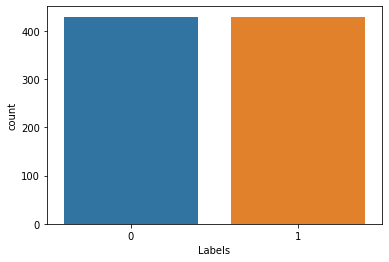

In [ ]:
# plot the targets
sns.countplot(data = df, x='Labels')

In [ ]:
# take a look at the length of the website content
text_corpus_len = df['Text Corpus'].apply(lambda x: len(str(x).split()))
for index, len in enumerate(text_corpus_len[:15]):
  print(f'Index: {index} Length: {len}')

Index: 0 Length: 7
Index: 1 Length: 63
Index: 2 Length: 16
Index: 3 Length: 10
Index: 4 Length: 2
Index: 5 Length: 13
Index: 6 Length: 24
Index: 7 Length: 7
Index: 8 Length: 23
Index: 9 Length: 11
Index: 10 Length: 10
Index: 11 Length: 11
Index: 12 Length: 11
Index: 13 Length: 122
Index: 14 Length: 33


In [ ]:
# calculate statistics including minimum, maximum, mean, mode and standard deviation
print('Min: ', np.min(text_corpus_len))
print('Max: ', np.max(text_corpus_len))
print('Mean: ', np.mean(text_corpus_len))
print('Mode: ', mode(text_corpus_len)[0][0])
print('Std: ', np.std(text_corpus_len))

Min:  0
Max:  474
Mean:  22.20813953488372
Mode:  7
Std:  35.34543395107539


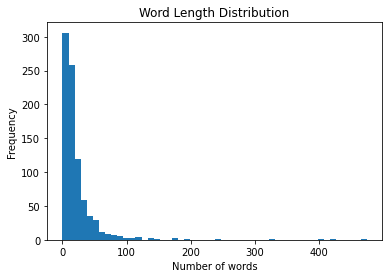

In [ ]:
# plot the word length distribution
plt.hist(text_corpus_len, bins=50)
plt.title('Word Length Distribution')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

**Summary:**

* The dataset is relatively small with only 860 samples: cross_validation might ensure better results
* The targets (labels) are balanced: over-/undersampling is not necessary
* The extracted content per website is very small (mode = 7 words): pre_trained embeddings can be tried to introduce more variability into the model


### **Preprocessing**

In [ ]:
# keep only relevant columns
df = df.drop(columns=['Title', 'Description'])
df.head(20)

,Website,Labels,Text Corpus
0,111.com.html,0,dns-net.ch | DNS-NET Services GmbH Über DNS-NET
1,12xl.de.html,1,Bekleidung in Übergrößen für Herren | Herren...
2,1a-buerotechnik.de.html,1,"Lastschrift, Kreditkarte und Rechnungskauf ohn..."
3,1a-yachtcharter.de.html,0,Yachtcharter - 9196 Yachten online chartern Al...
4,1blu.de.html,0,Neue Internetpräsenz.\n
5,1und1.info.html,0,"1&1 | Europas größter Hoster für Websites, Dom..."
6,4taktershop.de.html,1,4Taktershop - Baotian und Rex Roller Ersatztei...
7,5sterne-yachtcharter.de.html,0,5 Sterne Yachtcharter Mehr zu unserem Angebot
8,5vorflug.de.html,0,Last Minute Urlaub 5vorFlug® - Lastminute Flüg...
9,a-a-reisen.de.html,0,"A&A REISEN - BALATON, URLAUB, FERIENWOHNUNG, F..."


#### **Helper functions**

In [ ]:
# function to remove special characters
def remove_special_characters(text, for_embedding=False):
    # remove whitespaces and any html tags
    pattern_WSPACE = re.compile(r'\s+', re.IGNORECASE)
    pattern_TAGS = re.compile(r"<[^>]+>")
    
    # keep only ASCII + European characters and whitespace, no digits
    pattern_ASCII = re.compile(r'[^A-Za-zÀ-ž ]', re.IGNORECASE)

    # remove single letter characters
    pattern_SINGLECHAR = re.compile(r'\b[A-Za-zÀ-ž]\b', re.IGNORECASE)
    if for_embedding:
        # keep punctuation
        RE_ASCII = re.compile(r'[^A-Za-zÀ-ž,.!? ]', re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r'\b[A-Za-zÀ-ž,.!?]\b', re.IGNORECASE)

    # replace the leftmost non-overlapping occurrences of pattern in string by the replacement
    text = re.sub(pattern_TAGS, ' ', text)
    text = re.sub(pattern_ASCII, ' ', text)
    text = re.sub(pattern_SINGLECHAR, ' ', text)
    text = re.sub(pattern_WSPACE, ' ', text)
    return text

In [ ]:
# function to remove stopwords
def remove_stopwords(text, for_embedding=False):
    stopword_list = set(stopwords.words('german'))
    add_stopwords = ['und','für','mit', 'ac', 'aa', 'acs', 'ch', 'fuer', 'enter', 'beim', 'com', 'de']
    stopwords_list = stopword_list.union(add_stopwords)

    # using ToktokTokenizer for tokenization as it is one of the newer
    # has been tested on, and gives reasonably good results for Englisch, Persian, Russian, Czech, French, German, and many other languages
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens_lower = [token.strip().lower() for token in tokens]
    
    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        filtered_tokens = tokens
    else:
        # using SnowballStemmer since it supports stemming in many different languages
        stemmer = SnowballStemmer('german')
        filtered_tokens = [stemmer.stem(word) for word in tokens_lower if word not in stopword_list]
 
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#### **Cleaning**

In [ ]:
# putting it alltogther and clean the entire text corpus
def normalize_corpus(corpus, 
                    special_char_removal=True, 
                     stopword_removal=True, 
                     for_embedding=False):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # remove special characters and\or digits    
        if special_char_removal:
            doc = remove_special_characters(doc, for_embedding=for_embedding)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, for_embedding=for_embedding)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [ ]:
# get the vocabulary for the traditional, count-based (bow, tfidf) feature engineering
norm_corpus_bow = normalize_corpus(corpus=df['Text Corpus'], 
                    special_char_removal=True, 
                     stopword_removal=True, 
                     for_embedding=False)

# get vocabulary for the advanced (embeddings) feature engineering
# note: Word2vec seems to be mostly trained on raw corpus data (no stemming, lowering and punctuation / stop words removal)
norm_corpus_emb = normalize_corpus(corpus=df['Text Corpus'], 
                    special_char_removal=True, 
                     stopword_removal=True, 
                     for_embedding=True)

df['Clean_BoW'] = norm_corpus_bow
df['Clean_Emb'] = norm_corpus_emb

In [ ]:
# check the DataFrame
df.head(10)

,Website,Labels,Text Corpus,Clean_BoW,Clean_Emb
0,111.com.html,0,dns-net.ch | DNS-NET Services GmbH Über DNS-NET,dns net ch dns net servic gmbh dns net,dns net ch DNS NET Services GmbH Über DNS NET
1,12xl.de.html,1,Bekleidung in Übergrößen für Herren | Herren...,bekleid ubergross herr herrenmod onlin shop xl...,Bekleidung in Übergrößen für Herren Herrenmode...
2,1a-buerotechnik.de.html,1,"Lastschrift, Kreditkarte und Rechnungskauf ohn...",lastschrift kreditkart rechnungskauf paypal ko...,Lastschrift Kreditkarte und Rechnungskauf ohne...
3,1a-yachtcharter.de.html,0,Yachtcharter - 9196 Yachten online chartern Al...,yachtchart yacht onlin chart revi land,Yachtcharter Yachten online chartern Alle Revi...
4,1blu.de.html,0,Neue Internetpräsenz.\n,neu internetprasenz,Neue Internetpräsenz
5,1und1.info.html,0,"1&1 | Europas größter Hoster für Websites, Dom...",europas grosst host websit domain mail de neu ...,Europas größter Hoster für Websites Domains un...
6,4taktershop.de.html,1,4Taktershop - Baotian und Rex Roller Ersatztei...,taktershop baotian rex roll ersatzteil benzhou...,Taktershop Baotian und Rex Roller Ersatzteile ...
7,5sterne-yachtcharter.de.html,0,5 Sterne Yachtcharter Mehr zu unserem Angebot,stern yachtchart mehr angebot,Sterne Yachtcharter Mehr zu unserem Angebot
8,5vorflug.de.html,0,Last Minute Urlaub 5vorFlug® - Lastminute Flüg...,last minut urlaub vorflug lastminut flug schna...,Last Minute Urlaub vorFlug Lastminute Flüge Sc...
9,a-a-reisen.de.html,0,"A&A REISEN - BALATON, URLAUB, FERIENWOHNUNG, F...",reis balaton urlaub ferienwohn ferienhaus plat...,REISEN BALATON URLAUB FERIENWOHNUNG FERIENHÄUS...


In [ ]:
# check for empty or null values
df = df.replace(r'^(\s?)+$', np.nan, regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Website      860 non-null    object
 1   Labels       860 non-null    int64 
 2   Text Corpus  856 non-null    object
 3   Clean_BoW    855 non-null    object
 4   Clean_Emb    855 non-null    object
dtypes: int64(1), object(4)
memory usage: 33.7+ KB


In [ ]:
# remove empty or null values and check again
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Website      855 non-null    object
 1   Labels       855 non-null    int64 
 2   Text Corpus  855 non-null    object
 3   Clean_BoW    855 non-null    object
 4   Clean_Emb    855 non-null    object
dtypes: int64(1), object(4)
memory usage: 33.5+ KB


### **Word Cloud**

In [ ]:
# convert column to list
text = df['Clean_BoW'].tolist()
print(text)

['dns net ch dns net servic gmbh dns net', 'bekleid ubergross herr herrenmod onlin shop xl de willkomm onlin shop ubergross honeymoon find herrenmod modern stilvoll mann gross xl biet gross auswahl herr bekleid such einfach onlin shop passend herrenmod geschmack sich dabei', 'lastschrift kreditkart rechnungskauf paypal konto burotechn discount versand schnell kompetent preiswert avervision full hd aver', 'yachtchart yacht onlin chart revi land', 'neu internetprasenz', 'europas grosst host websit domain mail de neu kund angebot', 'taktershop baotian rex roll ersatzteil benzhou tuning teil takt zubehor webseit benutzt cooki bestmog shoppingerlebnis biet', 'stern yachtchart mehr angebot', 'last minut urlaub vorflug lastminut flug schnappchenreis hotlin taglich uhr inkl sonn feiertag', 'reis balaton urlaub ferienwohn ferienhaus plattense ungarn tschechi riesengebirg', 'tq shop sportbekleid fuer outdoor reg freizeit artikel bookmark', 'urlaub rabatt beim marktfuhr ab urlaub de ortstarif mob

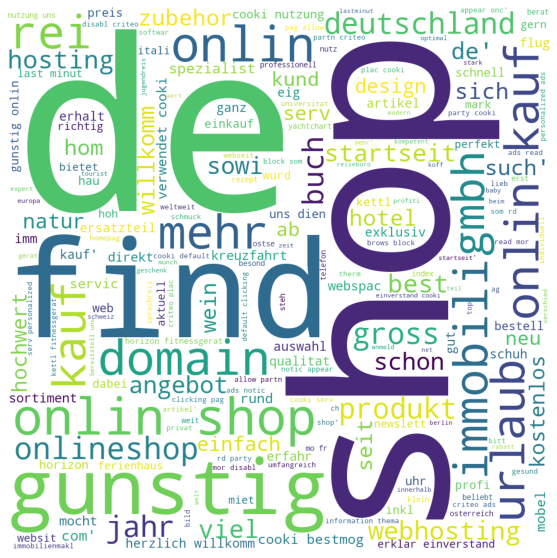

In [ ]:
# generate word cloud
wordcloud = WordCloud(
    background_color='white',
    width=1000,
    height=1000).generate(str(text))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### **Word Counter**

In [ ]:
# count the occurrences of each word in a given sentence
tokenizer = ToktokTokenizer()
corpus_norm = normalize_corpus(df['Text Corpus'])
corpus_string = [tokenizer.tokenize(description)
                  for description in corpus_norm]
corpus_tokens = [item for sublist in corpus_string for item in sublist]

word_counter = Counter()
word_counter.update(corpus_tokens)

In [ ]:
# show the most frequent words 
word_counter.most_common()[:20]

[('de', 167),
 ('shop', 161),
 ('onlin', 142),
 ('cooki', 113),
 ('kauf', 102),
 ('mehr', 72),
 ('gunstig', 60),
 ('com', 56),
 ('seit', 56),
 ('immobili', 55),
 ('reis', 52),
 ('find', 51),
 ('urlaub', 50),
 ('serv', 45),
 ('willkomm', 43),
 ('domain', 43),
 ('uns', 42),
 ('biet', 41),
 ('gmbh', 40),
 ('gross', 40)]

**Summary:** 

* The word cloud shows the words after the preprocessing steps; hightlighted words like **shop** and **gunstig** might be promising predictors for predicting the existance of a web shop
* Word Count confirms this impressions by listing the most frequent words such as **shop** and **online**.


###**Exporting the DataFrame to csv**

In [ ]:
df.to_csv('/content/drive/MyDrive/Webshop_classification/data/clean_train_dataset.csv', index=False)

### **Cleaning prediction data**

In [ ]:
# import and read csv from drive
df_pred = pd.read_csv('/content/drive/MyDrive/Webshop_classification/data/pred_dataset.csv')

In [ ]:
# check the size
print('The dataset has {} rows and {} columns'.format(df_pred.shape[0], df_pred.shape[1]))

The dataset has 200 rows and 4 columns


In [ ]:
# keep only relevant columns
df_pred = df_pred.drop(columns=['Title', 'Description'])
df_pred.head()

,Website,Text Corpus
0,77records.de.html,DJ Equipment | DJ Zubehör ★ 77records.de Versa...
1,absperrtechnik24.de.html,"Absperrpfosten, Schilder, Fahrradständer und m..."
2,ackermedia.de.html,Hosting - Avernis
3,acris-ecommerce.at.html,E-Commerce & Shopware Agentur aus Linz OÖ ► AC...
4,adepto-shop.de.html,ADEPTO - Reinigungsfachhandel - Versandkosten


In [ ]:
# get the vocabulary for tf-idf feature representation
norm_corpus_bow_pred = normalize_corpus(corpus=df_pred['Text Corpus'], 
                    special_char_removal=True, 
                     stopword_removal=True, 
                     for_embedding=False)

df_pred['Clean_BoW'] = norm_corpus_bow_pred

In [ ]:
# check for empty or null values
df_pred = df_pred.replace(r'^(\s?)+$', np.nan, regex=True)
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Website      200 non-null    object
 1   Text Corpus  200 non-null    object
 2   Clean_BoW    199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [ ]:
# print website with empty value
print(df_pred[df_pred.isna().any(axis=1)])

                   Website Text Corpus Clean_BoW
88  kreativgewerbe.de.html         []        NaN


In [ ]:
# remove empty or null values and check again
df_pred = df_pred.dropna().reset_index(drop=True)
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Website      199 non-null    object
 1   Text Corpus  199 non-null    object
 2   Clean_BoW    199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [ ]:
# export to csv-file
df_pred.to_csv('/content/drive/MyDrive/Webshop_classification/data/clean_pred_dataset.csv', index=False)